Loading frames 1 to 3482


frame:   0%|          | 0/3481 [00:00<?, ?it/s]

Frameset: wr_210518_32, 3481 frames with 12 channels JIT enabled
(3481, 32, 32, 28)
Frameset: wr_210518RGB, 3481 frames with 1 channels JIT enabled
(3481, 32, 32, 3)
(2784, 32, 32, 3)
(697, 32, 32, 3)


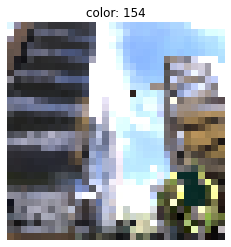

In [1]:
%load_ext autoreload
%autoreload 2

# load new frame-set

from repos.pyjunk.junktools.frameset import frameset

frameset_res = 32
#strNewFramesetName = 'primitives_64_wht'
strFramesetBaseName = 'wr_210518'
strFramesetName = strFramesetBaseName + '_' + str(frameset_res)
img_size = 32
batch_size = 128
test_batch_size = 128
#num_frames = 4900
#num_frames = 100
num_frames = None

orig_frameset = frameset(strFramesetName, num_frames=num_frames, fJITLoading=True, fVerbose=False)
orig_frameset.Print()
print(orig_frameset.shape())

# Split up into Conditional and RGB Target framesets
framesetRGB = frameset(
    sourceFrameset=orig_frameset, 
    strNewFramesetName=strFramesetBaseName + "RGB", 
    sourceChannels=['Color']
)

framesetRGB.Print()
#framesetRGB[0].visualize()

# #spheresCond.visualize()
# #framesetRGB.visualize()

# Shape of a single frame
print(framesetRGB.shape())

# split spheresRGB into spheresRGB_train, speheresRGB_test

framesetRGB_train, framesetRGB_test = framesetRGB.split_into_train_and_test(0.8)
print(framesetRGB_train.shape())
print(framesetRGB_test.shape())

framesetRGB_train[0].visualize()

In [5]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn

# Conv VAE
# Only learns the distribution of the target RGB images
# This network doesn't need anything outside of the target images and is entirely unsupervised 

from repos.pyjunk.models.Model import Model
from repos.pyjunk.models.SpatialConvVAE import SpatialConvVAE
from repos.pyjunk.junktools.frameset import frameset
from repos.pyjunk.solvers.ConvVAETorchSolver import ConvVAETorchSolver

import repos.pyjunk.junktools.pytorch_utils as ptu
#ptu.SetGPUMode(True)

# Set up model
num_rgb, H_rgb, W_rgb, C_rgb = framesetRGB.shape()
latent_dim = 16
batch_size = 128
test_batch_size = 20

#print("input dims: %d, %d, %d" % (H_frames, W_frames, C_frames))
print("target dims: %d, %d, %d" % (H_rgb, W_rgb, C_rgb))

modelConvVAE = SpatialConvVAE(
    input_shape=(H_rgb, W_rgb, C_rgb),
    latent_dim=latent_dim
)

# Test model
# npFrameBuffer = framesetRGB_train[0].GetNumpyBuffer()
# torchImageBuffer = torch.FloatTensor(npFrameBuffer)
# torchImageBuffer = torchImageBuffer.unsqueeze(0).to(ptu.GetDevice())
# print(torchImageBuffer.shape)
# torchImageBuffer = torchImageBuffer.permute(0, 3, 1, 2)
# modelConvVAE.encoder.forward(torchImageBuffer)

# loss = modelConvVAE.loss_with_frame(framesetRGB_train[0])
# print(loss)

# Set up the solver
dictSolverParams = {
    'lr': 1e-4,
    'epochs': 10000,
    'strOptimizer': 'Adam',
    'batch_size': batch_size,
    'test_batch_size': test_batch_size
}

# # Train on frameset (no minibatching yet)
solver = ConvVAETorchSolver(modelConvVAE, dictSolverParams)
# solver.train_frameset_and_plot_losses(
#     train_frameset=framesetRGB_train, 
#     test_frameset=framesetRGB_test,
#     fVerbose=True)

# # Sample the network
# sampleImages = modelConvVAE.sample(10)
# sampleImages[0].visualize()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
target dims: 32, 32, 3
3
spatial 32 -> 16 depth 8 -> 16
spatial 16 -> 8 depth 16 -> 32
linear 256 -> 32


In [7]:
import torch

strCheckpoint = "spatialConvVAE_checkpoint.tar"

solver.SaveCheckpoint(strCheckpoint, 0, 0)

In [3]:
import torch

strCheckpoint = "spatialConvVAE_checkpoint.tar"

solver.LoadCheckpoint(strCheckpoint)

NameError: name 'solver' is not defined

In [6]:
import torch

solver.train_frameset_and_plot_losses(
    train_frameset=framesetRGB_train, 
    test_frameset=framesetRGB_test,
    fVerbose=True)

Epoch:   0%|          | 0/10000 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

testing on frame:   0%|          | 0/20 [00:00<?, ?it/s]

training on frame:   0%|          | 0/128 [00:00<?, ?it/s]

KeyboardInterrupt: 

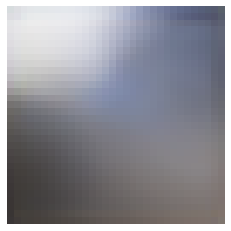

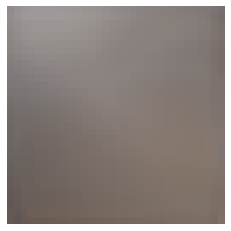

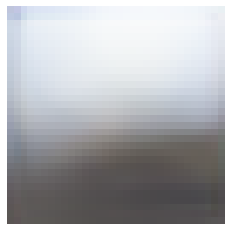

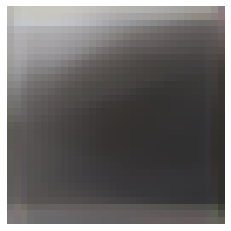

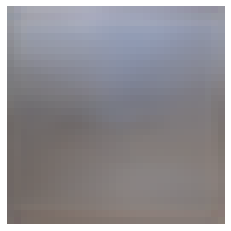

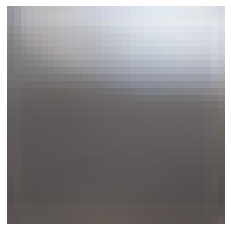

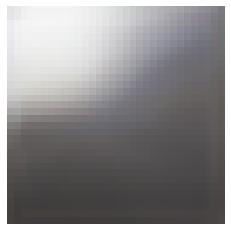

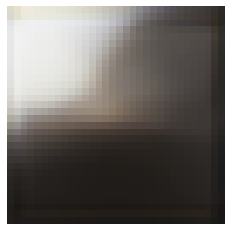

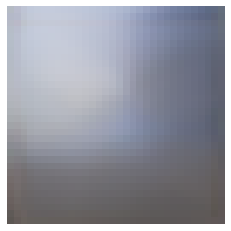

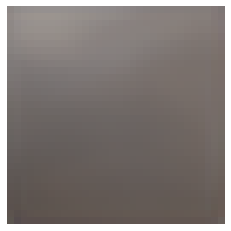

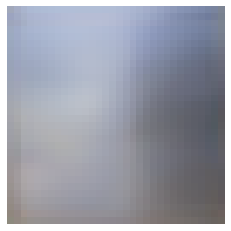

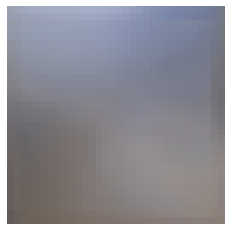

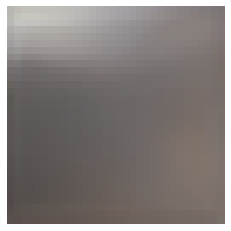

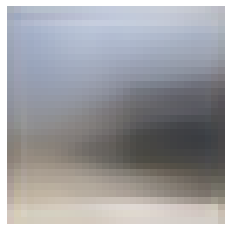

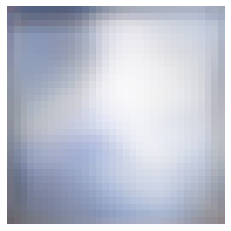

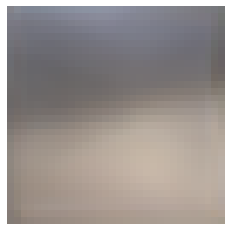

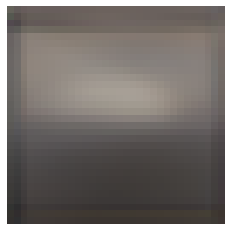

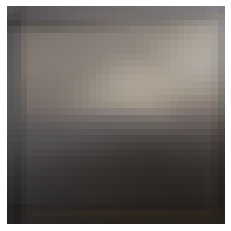

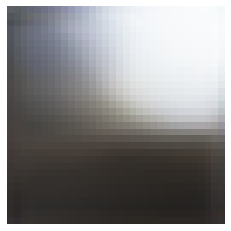

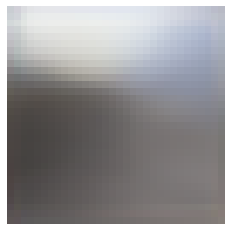

In [9]:
# Sample the network
sampleImages = modelConvVAE.sample(20)
for img in sampleImages:
    img.visualize()